<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/ml_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('data.csv')
dataset["Year"] = dataset["Date"] // 100
dataset.drop(columns=["Date"], inplace=True)
dataset = dataset[['Year', 'Value']]

In [ ]:
dataset.head()

,Year,Value
0,1895,80.3
1,1896,82.0
2,1897,83.4
3,1898,81.1
4,1899,81.6


In [ ]:
X = dataset['Year'].values
X = X.reshape(-1, 1)
y = dataset['Value'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([0.01086583])

In [ ]:
regressor.intercept_

61.18406125501846

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
# print(f"R2 score: {r2_score(y_test, y_pred)}")

In [ ]:
for i, j in zip(y_test, y_pred):
    print(f"Real value: {i}, predicted_value: {j}")

Real value: 81.5, predicted_value: 81.86173693005577
Real value: 85.1, predicted_value: 82.41589429181452
Real value: 80.6, predicted_value: 82.7744667023643
Real value: 81.8, predicted_value: 82.90485666983695
Real value: 81.4, predicted_value: 82.8287958554779
Real value: 84.7, predicted_value: 82.10078520375562
Real value: 83.7, predicted_value: 82.25290683247371
Real value: 82.9, predicted_value: 82.13338269562378
Real value: 83.3, predicted_value: 82.4593576143054
Real value: 81.6, predicted_value: 82.05732188126474
Real value: 79.7, predicted_value: 82.56801592053262
Real value: 81.0, predicted_value: 81.85087109943305
Real value: 84.1, predicted_value: 82.01385855877386
Real value: 84.1, predicted_value: 82.91572250045967
Real value: 79.9, predicted_value: 81.88346859130121
Real value: 82.7, predicted_value: 82.29637015496459
Real value: 85.2, predicted_value: 83.13303911291408
Real value: 81.0, predicted_value: 82.75273504111885
Real value: 83.4, predicted_value: 81.79654194631

In [ ]:
func_predict = lambda x: regressor.coef_[0] * x + regressor.intercept_

In [ ]:
X = dataset['Year'].values
y = func_predict(X)

<Axes: xlabel='Year', ylabel='Value'>

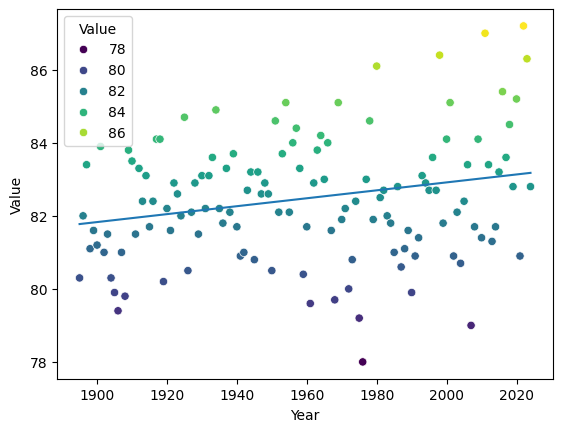

In [ ]:
plt.plot(X, y)
sns.scatterplot(x = dataset['Year'], y = dataset['Value'], hue=dataset['Value'], palette='viridis')

In [ ]:
X_xor = np.random.randn(200, 2) # generates an array of size (200, 2) from a standard normal distribution (mean = 0, standard deviation = 1).
Y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # True = X or y, False True and True, False and False
Y_xor = np.where(Y_xor, 1, -1)

<Axes: >

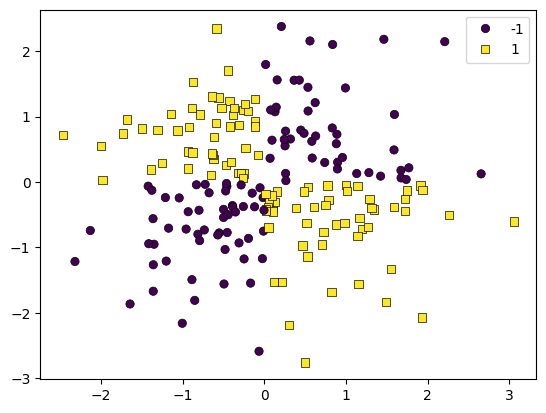

In [ ]:
sns.scatterplot(x=X_xor[:, 0], y=X_xor[:, 1], hue=Y_xor, palette='viridis',style=Y_xor, markers={-1: "o", 1: "s"}, edgecolor="black")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_xor, Y_xor, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24  4]
 [ 2 20]]


0.88

In [ ]:
from matplotlib.colors import ListedColormap

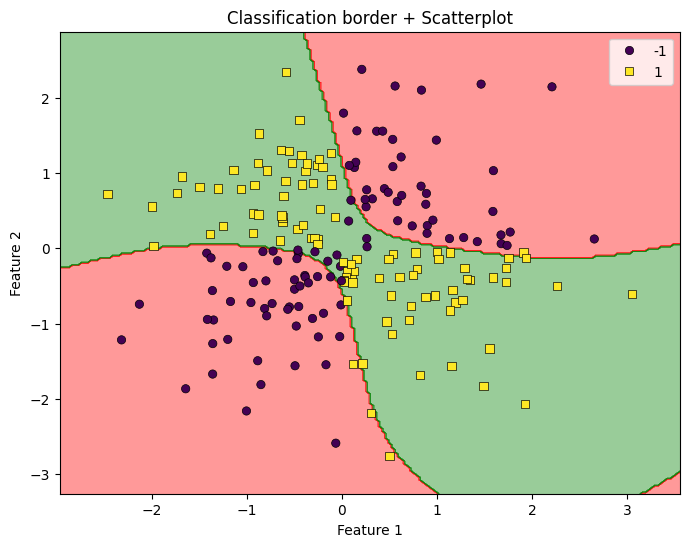

In [ ]:
X1, X2 = np.meshgrid(np.linspace(X_xor[:, 0].min() - 0.5, X_xor[:, 0].max() + 0.5, 200),
                     np.linspace(X_xor[:, 1].min() - 0.5, X_xor[:, 1].max() + 0.5, 200))

grid = np.array([X1.ravel(), X2.ravel()]).T
grid = sc.transform(grid)


y_grid = classifier.predict(grid).reshape(X1.shape)


plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, y_grid, alpha=0.4, cmap=ListedColormap(('red', 'green')))

sns.scatterplot(x=X_xor[:, 0], y=X_xor[:, 1], hue=Y_xor, palette='viridis',
                style=Y_xor, markers={-1: "o", 1: "s"}, edgecolor="black")


plt.title("Classification border + Scatterplot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

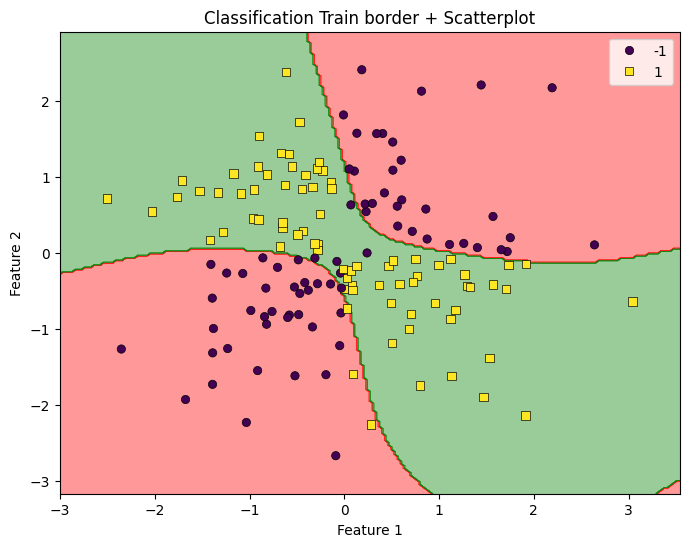

In [ ]:
X1, X2 = np.meshgrid(np.linspace(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5, 200),
                     np.linspace(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5, 200))

grid = np.array([X1.ravel(), X2.ravel()]).T
grid = sc.transform(grid)


y_grid = classifier.predict(grid).reshape(X1.shape)


plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, y_grid, alpha=0.4, cmap=ListedColormap(('red', 'green')))

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='viridis',
                style=y_train, markers={-1: "o", 1: "s"}, edgecolor="black")


plt.title("Classification Train border + Scatterplot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

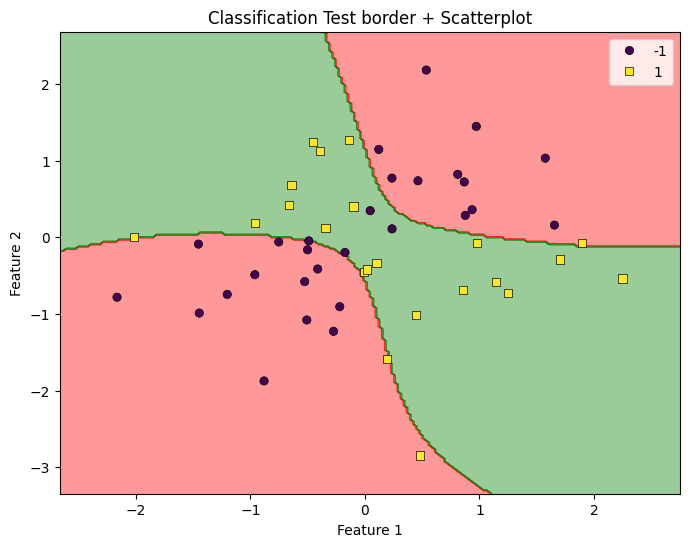

In [ ]:
X1, X2 = np.meshgrid(np.linspace(X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5, 200),
                     np.linspace(X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5, 200))

grid = np.array([X1.ravel(), X2.ravel()]).T
grid = sc.transform(grid)


y_grid = classifier.predict(grid).reshape(X1.shape)


plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, y_grid, alpha=0.4, cmap=ListedColormap(('red', 'green')))

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='viridis',
                style=y_test, markers={-1: "o", 1: "s"}, edgecolor="black")


plt.title("Classification Test border + Scatterplot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## K nearest neighbours classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24  2]
 [ 0 24]]


0.96

## Kernel SVM classifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22  4]
 [ 1 23]]


0.9

## Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21  5]
 [ 2 22]]


0.86